# CRISP-DM Phase-1 Data Understanding Phase

# Initial Exploratory Data Analysis

Goal of the project is to predict sales based on the historical data provided by sales, a retailer wants to know the sales of his outlet in different locations across the country.we have been given two datasets, one of them have historical data of the sales across the country, the other once we need to predict the sales based on different parameters given

In [1]:
import numpy as np
import pandas as pd
data_train= pd.read_csv("D:/machine learning casestudies/Retail-Data-Analytics-master/Train_Retail.csv")
data_test= pd.read_csv("D:/machine learning casestudies/Retail-Data-Analytics-master/Test_Retail.csv")
data_train['Source']= 'train'
data_test['Source']= 'test'

In [2]:
data_train.shape

(8523, 13)

In [3]:
data_test.shape

(5681, 12)

In [4]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [5]:
data_train[:1]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,train


In [6]:
data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Source                        object
dtype: object

we observe that our dataset has statistical values and also few categorical columns, also we will check for missing values in different attributes of dataset.

In [7]:
data_train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Source                          0
dtype: int64

In [8]:
data_test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Source                          0
dtype: int64

we can see Item_Weight and Outlet_Size have missing values in both train and test datasets

In [9]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The Column "Item_Weight" has values ranging from 4.55 to 21.35 with mean 12.85.count is shown as 7060 but we have 8523 total rows in training dataset. so 1463 missing values observed

"Item_Visibility" has values ranging from 0 to 0.33 with mean 0.06.but the min value is 0 which is not practically feasible in this column.since "Items_MRP" cant be sold unless it is displayed in shelves. we will change values in next stage

"Item_MRP" has values ranging from 31.29 to 266.88 with mean 140.99

"Outlet_Establishment_Year" has values ranging from 1985 to 2009. first store started at 1985 and most recent at 2009

In [10]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# CRISP-DM Phase-2 Data Preparation:

Once we accquire data and verify some of the quality metrics on the given data, in next level of CRISP_DM Methodology we do prepare data for applying modelling techniques in the next phase. steps involved:

selecting the data  required from the available input data

cleaning data- imputing values or removing the records

construct data- this step involves deriving new records or changing values of existing attributes in data wherever required

integrate data- combining the different sources which adds value to existing data

format data- synatactical modifications to the data to make as per the requirement of modelling algorithm

In our test dataset we have a total of 5681 no of rows, of these missing values for the attribite named "Item_Weight" , in next step we deal with missing values


# Dealing with Missing values in the dataset

Having missing values in the dataset complicates the process of predicting the output and create a model that performs well. in order to deal with the missing values on the first hand we need to identify cause for missing item values in the dataset. most of the times these datapoints are not recorded at the source or ignored while collecting data, if the data points are collected and ignored while taking it into consideration its often a good idea to re-enter those values from source. if not collected then we need to impute missing values

there are many ways to deal missing values based on the methodology we use, one way is to nimpute those missing values with mean values of that attribute type, althogh practically it is very simple way to deal with missing values. the result of this method are not so accurate so often. for this we try to impute with mean and built the model. later we will design model itself to specifically identify missing values

in order to avoid duplication of process to treat the missing values separetely in the test and train datasets, we are going to merge those tow datasets and do the operations

In [11]:
data= pd.concat([data_train, data_test])

In [12]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [13]:
data.shape

(14204, 13)

In [14]:
data.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


In combined dataset we have around 14204 rows. we have observed missing values in "Item_Weight". lets impute these Item_Weight by mean of Item_Weight

In [15]:
data.mean()

Item_MRP                      141.004977
Item_Outlet_Sales            2181.288914
Item_Visibility                 0.065953
Item_Weight                    12.792854
Outlet_Establishment_Year    1997.830681
dtype: float64

In [16]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [17]:
data= data.fillna(data.mean())

in previous step we deal with missing values for continuous variables. however we have missing values for categorical variables also, so we impute missing values with mode for categorical data attributes.

In [18]:
def coding(col, codeDict):
    colCoded = pd.Series(col, copy= True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace= True)
        return colCoded

In [19]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [20]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales               0
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Source                          0
dtype: int64

In [21]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [22]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
Source                       0
dtype: int64

In [23]:
print(data)

     Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0             Low Fat           FDA15  249.8092        3735.138000   
1             Regular           DRC01   48.2692         443.422800   
2             Low Fat           FDN15  141.6180        2097.270000   
3             Regular           FDX07  182.0950         732.380000   
4             Low Fat           NCD19   53.8614         994.705200   
5             Regular           FDP36   51.4008         556.608800   
6             Regular           FDO10   57.6588         343.552800   
7             Low Fat           FDP10  107.7622        4022.763600   
8             Regular           FDH17   96.9726        1076.598600   
9             Regular           FDU28  187.8214        4710.535000   
10            Low Fat           FDY07   45.5402        1516.026600   
11            Regular           FDA03  144.1102        2187.153000   
12            Regular           FDX32  145.4786        1589.264600   
13            Regula

# CRISP DM Phase-3 Data Construction

This phase involves modifying the records to make them more meaningful for the analytical purposes. as we saw in the previous phases such as Item_Visibility which are zero doesnt make sense, a item cant be sold unless it is displayed in the store. hence, it occupies some spaces on the display shelves.lets modify it with the mean valuse so that it will be consistent with other attributes

Item_Visibility depends on the store size. hence impute zero values with mean values





In [24]:
#find the average visibility by the store
avg_visibility= data.pivot_table(values= 'Item_Visibility', index= 'Outlet_Identifier')

In [25]:
print(avg_visibility)

                   Item_Visibility
Outlet_Identifier                 
OUT010                    0.101939
OUT013                    0.060242
OUT017                    0.061142
OUT018                    0.059976
OUT019                    0.107389
OUT027                    0.060344
OUT035                    0.060826
OUT045                    0.060907
OUT046                    0.060184
OUT049                    0.059000


In [26]:
sum(data['Item_Visibility'] == 0)

879

In [27]:
data.groupby(['Outlet_Identifier',]).mean()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Outlet_Identifier,,,,,
OUT010,141.159742,1076.126563,0.101939,12.722870,1998
OUT013,141.128428,2251.927877,0.060242,12.788139,1987
OUT017,140.998931,2276.941383,0.061142,12.782080,2007
OUT018,141.000899,2069.766739,0.059976,12.803638,2009
OUT019,140.752386,1076.713399,0.107389,12.792854,1985
OUT027,141.012347,3088.550567,0.060344,12.792854,1985
OUT035,141.107228,2335.820685,0.060826,12.804468,2004
OUT045,140.857341,2187.947878,0.060907,12.797096,2002
OUT046,140.821982,2239.222126,0.060184,12.813313,1997


In [28]:
data['Item_Visibility'] == 0

0       False
1       False
2       False
3        True
4        True
5        True
6       False
7       False
8       False
9       False
10       True
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5651    False
5652    False
5653    False
5654     True
5655    False
5656    False
5657    False
5658    False
5659    False
5660    False
5661     True
5662    False
5663    False
5664    False
5665    False
5666    False
5667    False
5668    False
5669    False
5670    False
5671    False
5672    False
5673    False
5674    False
5675    False
5676    False
5677    False
5678    False
5679     True
5680    False
Name: Item_Visibility, Length: 14204, dtype: bool

In [29]:
#Replace zero with mean value of visibility in that store
data["Item_Visibility"] = data.groupby("Outlet_Identifier").transform(lambda x: x.fillna(x.mean()))

In [30]:
sum(data['Item_Visibility'] == 0)

0

In [31]:
data.head(3)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,249.8092,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,48.2692,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,141.6180,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train


we successfully replaced the zero values in the item visibility with the mean values

classify the items into broad categories- creating a derived attribute

during this phase of data mining, we derive a new column based on the values present in the existing columns. lets derive item category based on the Item_Identifier

if we check the column Item_Identifier keenly we can observe that, Item_Identifier has FD, DR, NC. here i am naming the drived column as Item_category

In [32]:
data['Item_Category'] = data['Item_Identifier'].apply(lambda x: x[0:2])
# To make it more intuitive give the elobarated description
#data['Item_Category'] = data['Item_Category'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [33]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,Item_Category
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,249.8092,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,48.2692,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,141.6180,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,182.0950,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,53.8614,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,NC


# modifying values in Item_Identifier column

if we study the various columns in the data frame we can observe that column Item_Fat_Content has the following values

In [34]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

We can see that column Item_Fat_Content has two different values indicating each amount of Fat Content such as Low Fat and LF for items with low value of Fat content. Similarly with the Regular and reg for regular fat content items.

In [35]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data.reset_index(level=0, inplace= True)
#check if they are replaced or not
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [36]:
data.loc[data['Item_Category']== "Non-Consumable", 'Item_Fat_Content']= "Non-Edible"

Now we have two types of fat contents for all the items, however we know from the previous steps that we have non-consumable items. Having fat content for those items doesn't make sense. Let's create a new category for them.

In [37]:
data.head()

,index,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,Item_Category
0,0,Low Fat,FDA15,249.8092,3735.1380,Dairy,249.8092,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,FD
1,1,Regular,DRC01,48.2692,443.4228,Soft Drinks,48.2692,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,DR
2,2,Low Fat,FDN15,141.6180,2097.2700,Meat,141.6180,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,FD
3,3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,182.0950,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,FD
4,4,Low Fat,NCD19,53.8614,994.7052,Household,53.8614,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,NC


In [38]:
data.shape

(14204, 15)

for model building with sci-kit learn we need to have the variables as numeric values. However, we have few variables with the text columns. to convert them to numerical values sci-kit module provides a LabelEncoder from its preprocessing module

In [39]:
#from sklearn pre-processing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
#creating another variable for outlet
data['Outlet']= label_encoder.fit_transform(data['Outlet_Identifier'])
var_mod= ['Item_Fat_Content','Outlet_Location_Type', 'Outlet_Size', 'Item_Category', 'Outlet_Type', 'Outlet']
label_encoder= LabelEncoder()
for i in var_mod:
    data[i]= label_encoder.fit_transform(data[i])

In [40]:
data= pd.get_dummies(data, columns= ['Item_Fat_Content','Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Category', 'Outlet'])

In [41]:
data.dtypes

index                          int64
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Category_0                uint8
Item_Category_1                uint8
Item_Category_2                uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

# CRISP-DM Phase-4 Creating Data Models

in this stepp we are going to create models that are capable of predicting the Outlet_Sales. inorder to create these models first we split the given dataset into train and test datasets. train datset is the one which have the ItemOutlet_Sales values.we will train the model based on these models to predict the test dataset values

in this first we are going to create a basic linear regression model. lets split the dataset into train and test datasets . we already know that 8523 rows in train dataset  and rest of the rows are from test dataset

In [42]:
data_train=data[0:8522]
data_test=data[8523:]

In [43]:
data_train

,index,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Source,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0,FDA15,249.8092,3735.1380,Dairy,249.8092,9.300000,1999,OUT049,train,...,0,0,0,0,0,0,0,0,0,1
1,1,DRC01,48.2692,443.4228,Soft Drinks,48.2692,5.920000,2009,OUT018,train,...,0,0,0,1,0,0,0,0,0,0
2,2,FDN15,141.6180,2097.2700,Meat,141.6180,17.500000,1999,OUT049,train,...,0,0,0,0,0,0,0,0,0,1
3,3,FDX07,182.0950,732.3800,Fruits and Vegetables,182.0950,19.200000,1998,OUT010,train,...,1,0,0,0,0,0,0,0,0,0
4,4,NCD19,53.8614,994.7052,Household,53.8614,8.930000,1987,OUT013,train,...,0,1,0,0,0,0,0,0,0,0
5,5,FDP36,51.4008,556.6088,Baking Goods,51.4008,10.395000,2009,OUT018,train,...,0,0,0,1,0,0,0,0,0,0
6,6,FDO10,57.6588,343.5528,Snack Foods,57.6588,13.650000,1987,OUT013,train,...,0,1,0,0,0,0,0,0,0,0
7,7,FDP10,107.7622,4022.7636,Snack Foods,107.7622,12.792854,1985,OUT027,train,...,0,0,0,0,0,1,0,0,0,0
8,8,FDH17,96.9726,1076.5986,Frozen Foods,96.9726,16.200000,2002,OUT045,train,...,0,0,0,0,0,0,0,1,0,0
9,9,FDU28,187.8214,4710.5350,Frozen Foods,187.8214,19.200000,2007,OUT017,train,...,0,0,1,0,0,0,0,0,0,0


In [44]:
data_test

,index,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Source,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,0,FDW58,107.8622,2181.288914,Snack Foods,107.8622,20.750000,1999,OUT049,test,...,0,0,0,0,0,0,0,0,0,1
8524,1,FDW14,87.3198,2181.288914,Dairy,87.3198,8.300000,2007,OUT017,test,...,0,0,1,0,0,0,0,0,0,0
8525,2,NCN55,241.7538,2181.288914,Others,241.7538,14.600000,1998,OUT010,test,...,1,0,0,0,0,0,0,0,0,0
8526,3,FDQ58,155.0340,2181.288914,Snack Foods,155.0340,7.315000,2007,OUT017,test,...,0,0,1,0,0,0,0,0,0,0
8527,4,FDY38,234.2300,2181.288914,Dairy,234.2300,12.792854,1985,OUT027,test,...,0,0,0,0,0,1,0,0,0,0
8528,5,FDH56,117.1492,2181.288914,Fruits and Vegetables,117.1492,9.800000,1997,OUT046,test,...,0,0,0,0,0,0,0,0,1,0
8529,6,FDL48,50.1034,2181.288914,Baking Goods,50.1034,19.350000,2009,OUT018,test,...,0,0,0,1,0,0,0,0,0,0
8530,7,FDC48,81.0592,2181.288914,Baking Goods,81.0592,12.792854,1985,OUT027,test,...,0,0,0,0,0,1,0,0,0,0
8531,8,FDN33,95.7436,2181.288914,Snack Foods,95.7436,6.305000,2002,OUT045,test,...,0,0,0,0,0,0,0,1,0,0
8532,9,FDA36,186.8924,2181.288914,Baking Goods,186.8924,5.985000,2007,OUT017,test,...,0,0,1,0,0,0,0,0,0,0


In [45]:
data_train.dtypes

index                          int64
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Category_0                uint8
Item_Category_1                uint8
Item_Category_2                uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

Entire dataset have been splitted into train and test datasets, as a first model  in creating for predicting Item_Outlet_Sales_Values, we are going to create a linear regression model

# Linear Regression Model:

As the first model in the data modelling phase i would like to create a model based on the linear regression. Regression analysis is the science of fitting straight lines to patterns of data. Linear regression attempts the model insuch a way a relationship between two variables by fitting a linear equation to observed data

# Simple Linear Regression Model

In a simple linear regression model, we attempt to find the relation between two variables where one variable is known as response/dependent variable while other is considered as a predictor. we will build a model, as an analysis such that unit change in the predictor causes how much variation in the dependent variable.simplest form of the linear regression can be explained by a mathematical equation Y= a+bX, where X is the explanatory variable and Y is the dependentt variable. The slope of the fitting line is explained by "b" , while the "a" is the coefficient of the fitting line

# Multiple Linear Regression Model

In a simpler form of the linear regression model, we will be analyzing the Y value as variation in change of X value. in real life scenarios we cant simply determine the Y valuse based on single variable X. there are other predictors which tends to affect the Y value. in those of kind of cases, simple linear relationship doesnt give us the accurate results. to analyze those kinds of scenarios we use multiple linear regression model. mathematically we represent thsi with the equation Y= a+b0X0 +b1X1 +b2X2 +b3X3 +.......+bnXn, where b0,b1,b2...bn are co-efficients of X0,X1,X2,...Xn. a is the intercept of the line, while ε  is the constant error. in the above equation X0,X1,X2....Xn are the estimators which collectively determines the value of Y. 

if Xi changes by an amount ΔXi, holding other variables fixed, then the expected value of Y changes by a proportional amount biΔXi, for some constant bi (which is general could be a positive or negative number)

The value of bi is always same regardless of other values of Xi

The total effect of X's on the expected value of Y is the sum of squares of their individual effects. the art of regression modelling is to collect data that is relavant and informative with repect to your decision or inference problem, and then define your variables and construct your model in such a way that the assumptions listed above are plausible, atleast as a first order approximation to what is happening

# Evaluation of Performance - Regression Model:
One of the most frequently used metric for evaluation of model performance of Linear regression model is to determine the value of Root Mean
Square Error. The regression line predicts the average y value associated with a given x value. Note that is also necessary to get a measure of the
spread of the y values around that average. To do this, we use the root-mean-square error (r.m.s. error). To construct the r.m.s. error, you first need to
determine the residuals. Residuals are the difference between the actual values and the predicted values. I denoted them by , where is the observed
value for the ith observation and is the predicted value. They can be positive or negative as the predicted value under or over estimates the actual
value. Squaring the residuals, averaging the squares, and taking the square root gives us the r.m.s error. You then use the r.m.s. error as a measure
of the spread of the y values about the predicted y value.

In [46]:
data_train.shape

(8522, 35)

In [47]:
features= data_train.iloc[:,[0,2,5,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]].values
label= data_train.iloc[:,[3]].values

In [48]:
print(features)

[[0.000000e+00 2.498092e+02 2.498092e+02 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [1.000000e+00 4.826920e+01 4.826920e+01 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [2.000000e+00 1.416180e+02 1.416180e+02 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 ...
 [8.519000e+03 1.081570e+02 1.081570e+02 ... 1.000000e+00 0.000000e+00
  0.000000e+00]
 [8.520000e+03 8.512240e+01 8.512240e+01 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [8.521000e+03 1.031332e+02 1.031332e+02 ... 0.000000e+00 0.000000e+00
  0.000000e+00]]


In [49]:
print(label)

[[3735.138 ]
 [ 443.4228]
 [2097.27  ]
 ...
 [ 549.285 ]
 [1193.1136]
 [1845.5976]]


In [50]:
print(type(features))
print(type(label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [51]:
#Create the Linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(features,label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = model.fit(features, label)
#Label Prediction
label_pred = lm.predict(features)
label_pred

array([[4056.],
       [ 552.],
       [2360.],
       ...,
       [1720.],
       [1520.],
       [1416.]])

In [53]:
data_test_predictions= lm.predict(data_test.iloc[:,[0,2,5,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]].values)
data_test_predictions

array([[1832.],
       [1568.],
       [1880.],
       ...,
       [1824.],
       [3552.],
       [1280.]])

# Plotting the coefficients of our prediction model

In [54]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(label, label_pred))
r2 = lm.score(features, label)
print(rmse)
print(r2)

1127.5982498120902
0.5633520042044551


In [55]:
type(label_pred)

numpy.ndarray

In [56]:
type(label_pred)

numpy.ndarray

# Decision Tree Regression Model

In the previous section we have dealt with a linear regression model that usually works well with the numerical predictions. Having said that, we have
many other models that can better predict the numerical values. One such model here is using a Decision tree model. Decision tree models are often
used in the classification. However, they are good at predicting the continuous output variable. Decision tree models are so simple to understand. We
can visualize the conditions used to arrive at the conclusion in a simple if-else ladder. This makes it more attractive in machine learning applications
that don't need a complex understanding of statistical formulae in arriving at a conclusion/decision.

Let's apply the Decision tree regressor model to our Retail Data Analytics data. First fit the model using the train data we have already. Later we will
be using this model to predict Item_Outlet_Sales for our test data.

In [57]:
from sklearn.tree import DecisionTreeRegressor
DT_model= DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT=DT_model.fit(features, label)

We created a model that best fits our train data. A way to visualize the Decision tree model is to use graphviz. I'm going to write the conditions onto a
text file and later copy those data into graphviz website which then gives me a Decision Tree in pictorial representation.

In [58]:
from sklearn import tree
tree.export_graphviz(DT,out_file='tree.dot')

In [59]:
import os
os.environ["PATH"]+= os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

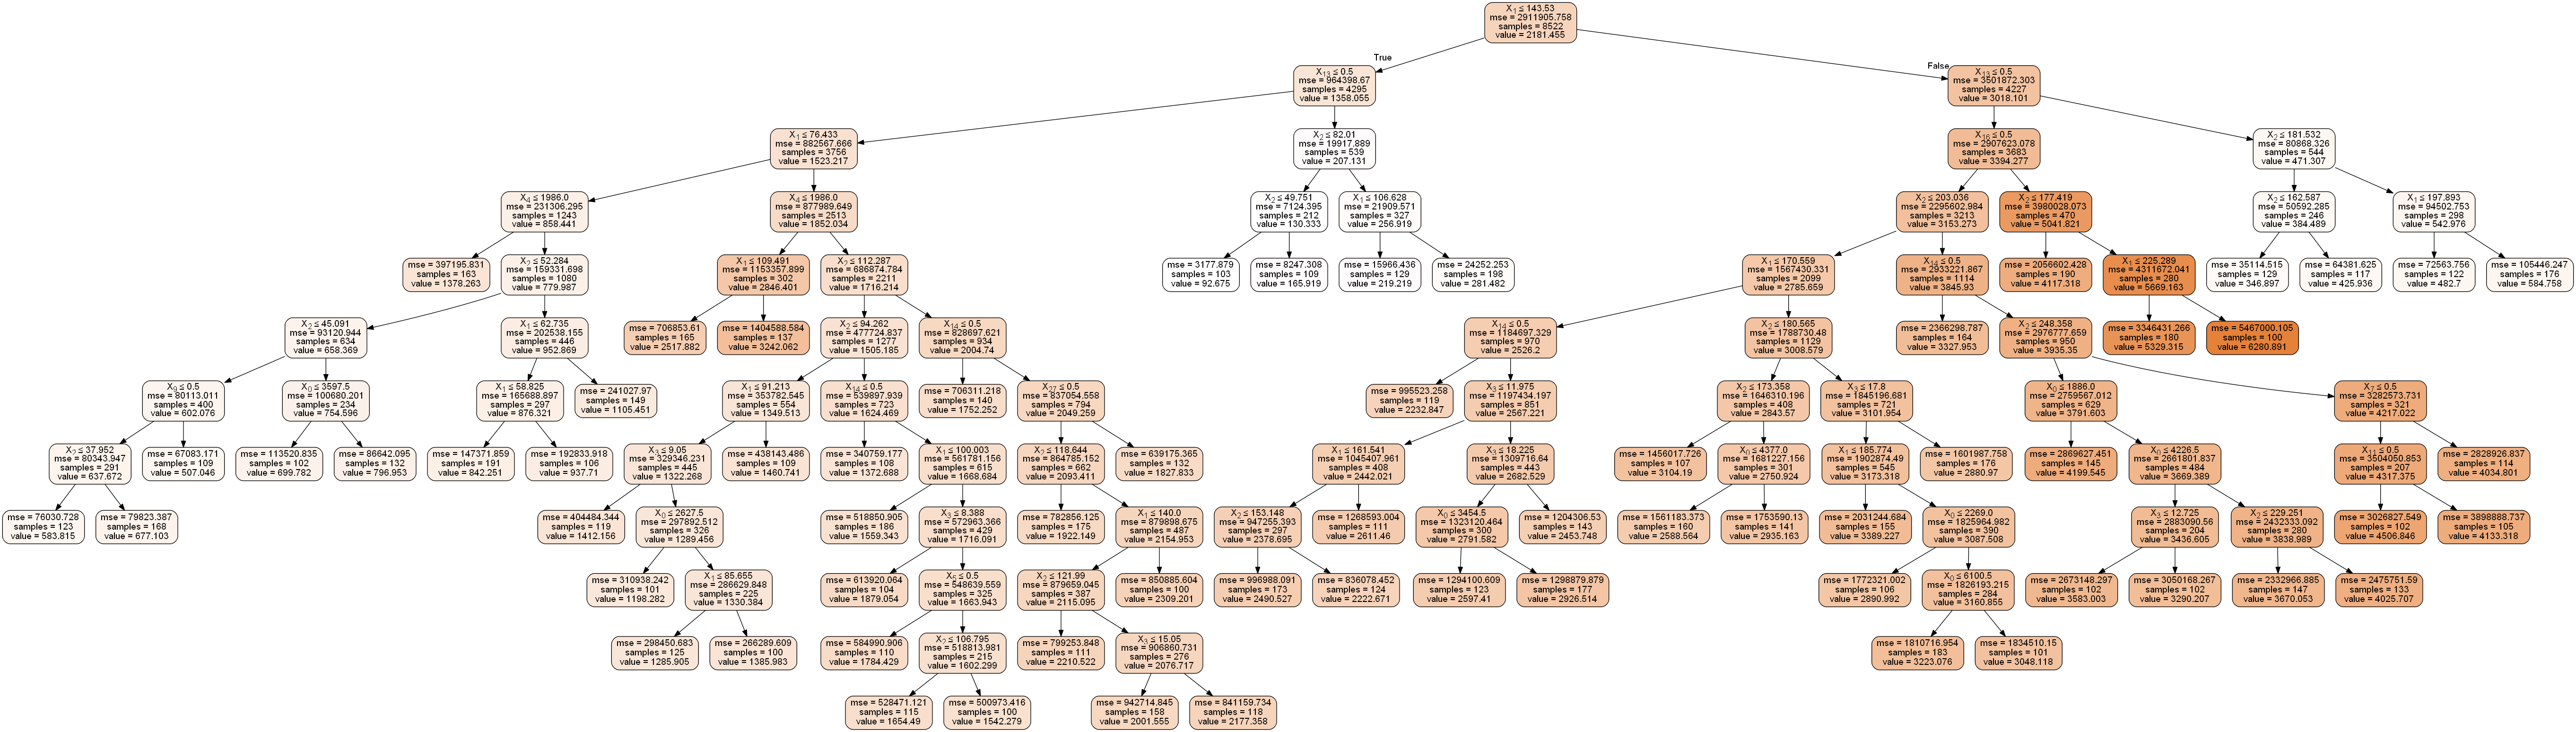

In [60]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

dot_data= StringIO()

export_graphviz(DT, out_file= dot_data, filled= True, rounded=True, special_characters=True)

graph= pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())

In [61]:
label1 = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier','Source','Item_Type']
feature1 = [x for x in data_train.columns if x not in [label1]+IDcol]

In [62]:
feature_imp= pd.Series(DT.feature_importances_, feature1).sort_values(ascending= False)

In [63]:
feature_imp.plot(kind= 'bar' , title= 'Important Features')

From the above bar graph it is clearly evident that there are only 4 predaminant features that are used in decision tree model. Most used features in the order of their importance are
1. Item_MRP
2. Outlet_Type_0
3. Item_Visibility
4. Outlet_5
5. Outlet_Establishment_Year

We can validate our model by knowing the performance of our model for our train data. After calculating the Item_Outlet_Sales for our training data
and knowing the deviance from the actual values by calculating RMSE value like we did in our Linear Regression Model, it gives us a Level playing
field to compare both of our models.
Let's predict the values for our training data using DT_Model

In [64]:
y_train_predicted= DT.predict(features)
y_train_predicted

array([4034.80056316,  699.7819098 , 2309.200798  , ..., 1879.05405   ,
       1285.9048144 , 1372.68849074])

With the Predicted Item Outlet Sale values in hand let's calculate the RMSE value for our DT_Model

In [65]:
rmse = np.sqrt(mean_squared_error(label, y_train_predicted))
r2 = model.score(features, label)
print(rmse)
print(r2)

1058.9466456895912
0.5633520042044551


# CRISP DM Phase-5 Model Evaluation

In this phase of the project we're going to evaluate the models that we've built so far based on the common industry standard benchmarks for
different models. One such model here we used is RMSE. Regardless of the models we built RMSE is a common metric that evaluates the
correctness of the model. It is Root Mean Square of all the deviations of predicted values from actual values in the test data.

In the previous phase we calculated the RMSE value for both of models built for this project. We have the RMSE values 1127 and 1058 for our Linear
Regression and Decision Tree Regression Model respectively. With the slightest understanding we can identify that Decision Tree Regressor model
performed well compared to the Multi-Value Linear Regression Model. Hence, we are going to use Decision Tree Regressor model to predict the
Item_Outlet_Sales values for our Test Data. Let's do the prediction using Decision Tree Regressor model.

In [66]:
y_test_predicted= DT.predict(data_test.iloc[:,[0,2,5,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]].values)
y_test_predicted

array([1542.279094  , 1412.15620504,  584.75776477, ..., 1827.83284545,
       3670.05265306, 1285.9048144 ])

In the above step we predicted values for our test dataset. Let's glue these Item_Outlet_Sales values to our test dataset and create a csv file for
further understanding of how different stores are performing using a dashboard tool.

In [67]:
data_test['Item_Outlet_Sales']= y_test_predicted
Retail_Data= pd.concat([data_train, data_test])

C:\Users\praveen330\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
data_test.to_csv("D:/machine learning casestudies/Retail-Data-Analytics-master/Retail_Data_Output_file.csv")
Retail_Data.to_csv("D:/machine learning casestudies/Retail-Data-Analytics-master/Retail_Data.csv")

In [69]:
data_train['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
5        556.6088
6        343.5528
7       4022.7636
8       1076.5986
9       4710.5350
10      1516.0266
11      2187.1530
12      1589.2646
13      2145.2076
14      1977.4260
15      1547.3192
16      1621.8888
17       718.3982
18      2303.6680
19      2748.4224
20      3775.0860
21      4064.0432
22      1587.2672
23       214.3876
24      4078.0250
25       838.9080
26      1065.2800
27       308.9312
28       178.4344
29       125.8362
          ...    
8492    2419.5172
8493    4727.1800
8494    1637.8680
8495    4314.3840
8496    3715.1640
8497    2247.0750
8498    1601.2490
8499    2976.1260
8500    1907.5170
8501    1508.0370
8502    3020.0688
8503    3392.9168
8504    4138.6128
8505    2117.2440
8506    3944.8650
8507     515.9950
8508    2587.9646
8509     424.7804
8510    7182.6504
8511    4207.8560
8512    2479.4392
8513     595.2252
8514     468.7232
8515    1571.2880
8516     8

In [70]:
columns= ['Predicted_Sales']
values= label_pred
label_pred1=  pd.DataFrame(label_pred, columns= columns)
label_pred1

,Predicted_Sales
0,4056.0
1,552.0
2,2360.0
3,1016.0
4,888.0
5,616.0
6,1008.0
7,3192.0
8,1544.0
9,3128.0


In [71]:
print(model.coef_)

[[-1.78853102e-05 -2.66058891e+13  2.66058891e+13 -5.59632053e-01
  -1.12854662e+13 -8.55651039e+14 -8.55651039e+14 -2.36452573e+16
   6.25319967e+15 -1.73246195e+16  1.06965411e+16 -2.69019911e+16
  -8.40773414e+15 -2.00017149e+15  1.93417549e+15 -6.22303685e+15
   1.03079918e+16  3.14062234e+15  3.14062234e+15  3.14062234e+15
   2.27628661e+16 -1.88941532e+16 -4.64773089e+15  2.71098716e+16
   1.04425358e+16  1.03079918e+16 -2.31758443e+16 -4.70415822e+15
   6.64361440e+15  2.51604423e+16]]


In [72]:
df= pd.DataFrame({'Actual': data_train['Item_Outlet_Sales'], 'Predicted': label_pred1['Predicted_Sales']})
df['Predicted_Error']= df['Actual']-df['Predicted']
df

,Actual,Predicted,Predicted_Error
0,3735.1380,4056.0,-320.8620
1,443.4228,552.0,-108.5772
2,2097.2700,2360.0,-262.7300
3,732.3800,1016.0,-283.6200
4,994.7052,888.0,106.7052
5,556.6088,616.0,-59.3912
6,343.5528,1008.0,-664.4472
7,4022.7636,3192.0,830.7636
8,1076.5986,1544.0,-467.4014
9,4710.5350,3128.0,1582.5350
